In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from sklearn import linear_model  
from sklearn.linear_model import LogisticRegression 
kickstarter = pd.read_csv ("https://raw.githubusercontent.com/rohithkuna/Rohith-IT_533/main/rohith%20dm%20dataset.csv")
kickstarter.dropna(inplace=True)
kickstarter = kickstarter.rename(columns = {'usd pledged': 'usd_pledged'})
kickstarter.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [44]:
kickstarter.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                  int64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd_pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

My dependent variable is Backers. The main other attributes it depends up on are usd_pledged, Usd_pledged_real, Usd_goal_real. Others are independent from each other.

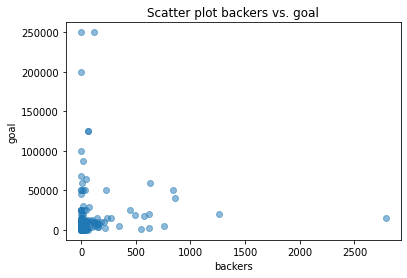

In [45]:
plt.scatter(kickstarter['backers'], kickstarter['goal'], alpha=0.5)
plt.title('Scatter plot backers vs. goal')
plt.xlabel('backers')
plt.ylabel('goal')
plt.show()

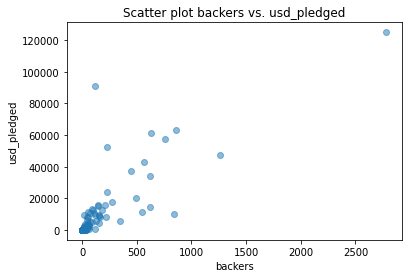

In [46]:
plt.scatter(kickstarter['backers'], kickstarter['usd_pledged'], alpha=0.5)
plt.title('Scatter plot backers vs. usd_pledged')
plt.xlabel('backers')
plt.ylabel('usd_pledged')
plt.show()

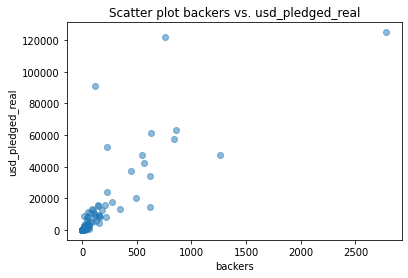

In [47]:
plt.scatter(kickstarter['backers'], kickstarter['usd_pledged_real'], alpha=0.5)
plt.title('Scatter plot backers vs. usd_pledged_real')
plt.xlabel('backers')
plt.ylabel('usd_pledged_real')
plt.show()

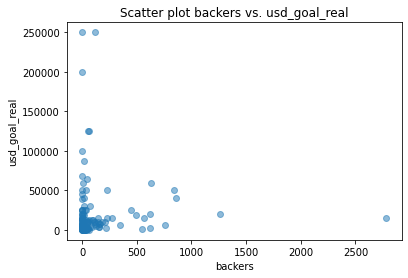

In [48]:
plt.scatter(kickstarter['backers'], kickstarter['usd_goal_real'], alpha=0.5)
plt.title('Scatter plot backers vs. usd_goal_real')
plt.xlabel('backers')
plt.ylabel('usd_goal_real')
plt.show()

We have setup the scatterplots between every dependent variables with the backers.

In [7]:
kickstarter.corr()

,ID,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.030672,0.016221,0.025452,0.065934,0.017723,0.033426
goal,0.030672,1.000000,0.245010,0.027965,0.268216,0.229149,0.999233
pledged,0.016221,0.245010,1.000000,0.838271,0.952491,0.993388,0.245728
backers,0.025452,0.027965,0.838271,1.000000,0.820840,0.818226,0.028483
usd_pledged,0.065934,0.268216,0.952491,0.820840,1.000000,0.932899,0.268810
usd_pledged_real,0.017723,0.229149,0.993388,0.818226,0.932899,1.000000,0.230692
usd_goal_real,0.033426,0.999233,0.245728,0.028483,0.268810,0.230692,1.000000


Here we have to calculate the crrelation between the values that are dependent with Backers. As backers is our given dependent variable I've taken ud_real, Usd_pledged_real and usd_goal_real.

Simple linear regression.         
It is nothing but it consists of two variables, where one is dependent variable and the other is independent variable. It finds a linear function as accurately as possible.


In [49]:
X = kickstarter['backers']
y = kickstarter['goal']
X = sm.add_constant(X)
kickstarter.mod1 = sm.OLS(y, X).fit()  
kickstarter.mod1_summary = kickstarter.mod1.summary()
print(kickstarter.mod1_summary)

                            OLS Regression Results                            
Dep. Variable:                   goal   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1151
Date:                Fri, 17 Jun 2022   Prob (F-statistic):              0.735
Time:                        05:04:22   Log-Likelihood:                -1782.0
No. Observations:                 149   AIC:                             3568.
Df Residuals:                     147   BIC:                             3574.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.776e+04   3321.039      5.348      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
print('Parameters: ', kickstarter.mod1.params)
print('R2: ', kickstarter.mod1.rsquared)

Parameters:  const      14312.674126
pledged        0.499180
dtype: float64
R2:  0.06002970199706503


In [50]:
predictions = kickstarter.mod1.predict(X)
predictions

0      17760.420870
1      17814.874028
2      17771.311502
3      17764.051081
4      17811.243818
           ...     
144    17764.051081
145    17767.681291
146    17811.243818
147    17764.051081
148    17760.420870
Length: 149, dtype: float64

In [51]:
X = kickstarter['backers']
y = kickstarter['usd_pledged']
X = sm.add_constant(X)
kickstarter.mod1 = sm.OLS(y, X).fit()  
kickstarter.mod1_summary = kickstarter.mod1.summary()
print(kickstarter.mod1_summary)

                            OLS Regression Results                            
Dep. Variable:            usd_pledged   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     303.6
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.40e-37
Time:                        05:04:30   Log-Likelihood:                -1577.4
No. Observations:                 149   AIC:                             3159.
Df Residuals:                     147   BIC:                             3165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1655.6398    841.501      1.967      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [52]:
print('Parameters: ', kickstarter.mod1.params)
print('R2: ', kickstarter.mod1.rsquared)

Parameters:  const      1655.639791
backers      47.252794
dtype: float64
R2:  0.6737788096192576


In [53]:
predictions = kickstarter.mod1.predict(X)
predictions

0      1655.639791
1      2364.431705
2      1797.398174
3      1702.892586
4      2317.178911
          ...     
144    1702.892586
145    1750.145380
146    2317.178911
147    1702.892586
148    1655.639791
Length: 149, dtype: float64

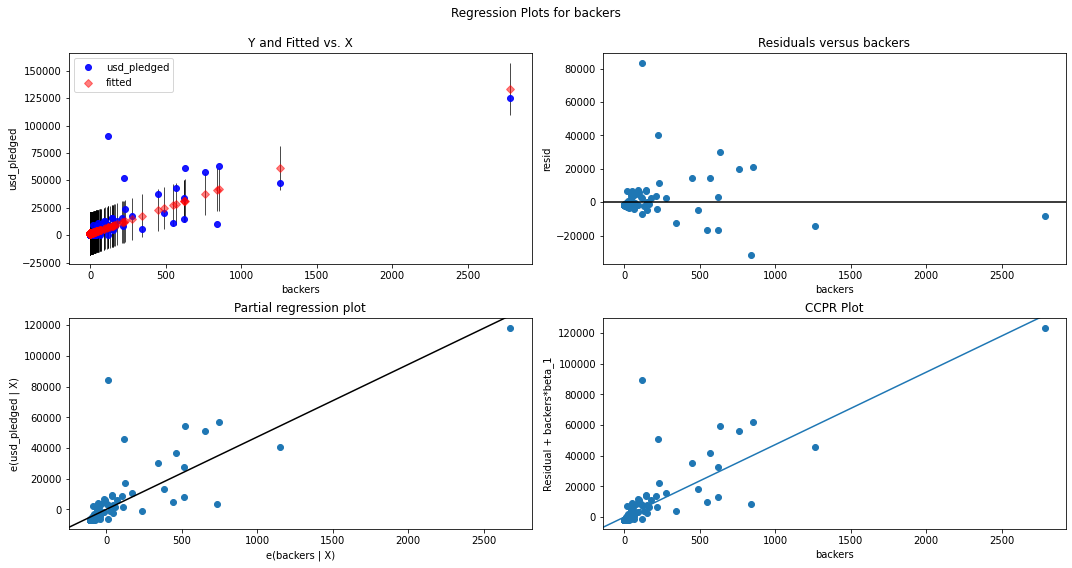

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(kickstarter.mod1, "backers", fig=fig)

Multiple Regression.       
It is a statistical technique that is used to analyze the relation between a single dependent variable and multiple independent variables. 

In [55]:
kickstarter.info

<bound method DataFrame.info of              ID                                               name  \
0    1000002330                    The Songs of Adelaide & Abullah   
1    1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2    1000004038                                     Where is Hank?   
3    1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4    1000011046  Community Film Project: The Art of Neighborhoo...   
..          ...                                                ...   
144  1000586849                       #NotMyPresident Protest Tees   
145  1000590709                                 Musical Light Suit   
146  1000598804                                 Gone In 61 Seconds   
147  1000600012  YA science-fiction/comedy book series: Zeek Ki...   
148  1000600526    Rising Star - Unsigned Artist Compilation Album   

           category main_category currency    deadline   goal  \
0            Poetry    Publishing      GBP   10/9/2015   1000 

In [56]:
X = kickstarter[['pledged','backers','usd_pledged_real']] 
y = kickstarter['goal'] 
print(X) 

     pledged  backers  usd_pledged_real
0        0.0        0              0.00
1     2421.0       15           2421.00
2      220.0        3            220.00
3        1.0        1              1.00
4     1283.0       14           1283.00
..       ...      ...               ...
144     25.0        1             25.00
145     20.0        2             20.00
146    875.0       14            875.00
147      1.0        1              1.43
148      0.0        0              0.00

[149 rows x 3 columns]


In [57]:
lm = linear_model.LinearRegression() 
model = lm.fit(X,y) 

In [58]:
lm.score(X,y)

0.20792903049989997

In [59]:
lm.coef_

array([  5.38605162, -89.08942609,  -3.56861296])

In [60]:
lm.intercept_

14258.66390812772

In [61]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                149 non-null    int64  
 1   name              149 non-null    object 
 2   category          149 non-null    object 
 3   main_category     149 non-null    object 
 4   currency          149 non-null    object 
 5   deadline          149 non-null    object 
 6   goal              149 non-null    int64  
 7   launched          149 non-null    object 
 8   pledged           149 non-null    float64
 9   state             149 non-null    object 
 10  backers           149 non-null    int64  
 11  country           149 non-null    object 
 12  usd_pledged       149 non-null    float64
 13  usd_pledged_real  149 non-null    float64
 14  usd_goal_real     149 non-null    float64
dtypes: float64(4), int64(3), object(8)
memory usage: 18.6+ KB


In [62]:
X = kickstarter.iloc[:, :-1].values
y = kickstarter.iloc[:, 14].values
print(X)
print(y)

[[1000002330 'The Songs of Adelaide & Abullah' 'Poetry' ... 'GB' 0.0 0.0]
 [1000003930 'Greeting From Earth: ZGAC Arts Capsule For ET'
  'Narrative Film' ... 'US' 100.0 2421.0]
 [1000004038 'Where is Hank?' 'Narrative Film' ... 'US' 220.0 220.0]
 ...
 [1000598804 'Gone In 61 Seconds' 'Tabletop Games' ... 'US' 420.0 875.0]
 [1000600012 "YA science-fiction/comedy book series: Zeek Kim'lo"
  'Young Adult' ... 'GB' 1.44 1.43]
 [1000600526 'Rising Star - Unsigned Artist Compilation Album' 'Hip-Hop'
  ... 'GB' 0.0 0.0]]
[1.533950e+03 3.000000e+04 4.500000e+04 5.000000e+03 1.950000e+04
 5.000000e+04 1.000000e+03 2.500000e+04 1.250000e+05 6.500000e+04
 2.406390e+03 1.250000e+04 5.000000e+03 2.000000e+05 6.469730e+03
 2.500000e+03 1.500000e+03 3.000000e+03 2.500000e+02 5.000000e+03
 2.000000e+04 2.026100e+03 3.500000e+03 6.555000e+01 1.750000e+02
 1.000000e+04 1.748965e+04 1.531304e+04 1.429100e+02 5.000000e+04
 5.181120e+03 1.000000e+03 1.427350e+03 2.500000e+04 1.200000e+04
 1.000000e+04 4.00

In [63]:
kickstarter1 =  pd.read_csv ("https://raw.githubusercontent.com/rohithkuna/Rohith-IT_533/main/rohith%20dm%20dataset.csv")
kickstarter1.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [64]:
del kickstarter1['category']
kickstarter1.head()

,ID,name,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Publishing,GBP,10/9/2015,1000,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,11/1/2017,30000,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Film & Video,USD,2/26/2013,45000,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,4/16/2012,5000,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,USD,8/29/2015,19500,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [65]:
del kickstarter1['main_category']
kickstarter1.head()

,ID,name,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,GBP,10/9/2015,1000,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,USD,11/1/2017,30000,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,USD,2/26/2013,45000,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,USD,4/16/2012,5000,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,USD,8/29/2015,19500,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [66]:
del kickstarter1['currency']
kickstarter1.head()

,ID,name,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,10/9/2015,1000,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,11/1/2017,30000,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,2/26/2013,45000,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,4/16/2012,5000,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,8/29/2015,19500,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [67]:
del kickstarter1['state']
kickstarter1.head()

,ID,name,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,10/9/2015,1000,8/11/2015 12:12,0.0,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,11/1/2017,30000,9/2/2017 4:43,2421.0,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,2/26/2013,45000,1/12/2013 0:20,220.0,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,4/16/2012,5000,3/17/2012 3:24,1.0,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,8/29/2015,19500,7/4/2015 8:35,1283.0,14,US,1283.0,1283.0,19500.00


In [68]:
del kickstarter1['deadline']
kickstarter1.head()

,ID,name,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,1000,8/11/2015 12:12,0.0,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,30000,9/2/2017 4:43,2421.0,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,45000,1/12/2013 0:20,220.0,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,5000,3/17/2012 3:24,1.0,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,19500,7/4/2015 8:35,1283.0,14,US,1283.0,1283.0,19500.00


In [69]:
del kickstarter1['launched']
kickstarter1.head()

,ID,name,goal,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,1000,0.0,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,30000,2421.0,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,45000,220.0,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,5000,1.0,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,19500,1283.0,14,US,1283.0,1283.0,19500.00


In [70]:
del kickstarter1['country']
kickstarter1.head()

,ID,name,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,1000,0.0,0,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,30000,2421.0,15,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,45000,220.0,3,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,5000,1.0,1,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,19500,1283.0,14,1283.0,1283.0,19500.00


In [71]:
del kickstarter1['name']
kickstarter1.head()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,1000,0.0,0,0.0,0.0,1533.95
1,1000003930,30000,2421.0,15,100.0,2421.0,30000.00
2,1000004038,45000,220.0,3,220.0,220.0,45000.00
3,1000007540,5000,1.0,1,1.0,1.0,5000.00
4,1000011046,19500,1283.0,14,1283.0,1283.0,19500.00


In [72]:
X = kickstarter1.iloc[:, :-1].values
y = kickstarter1.iloc[:, 3].values
X = np.append(arr = np.ones((149, 1)).astype(int), values = X, axis = 1) 

X_opt = X[:, [0, 1, 2, 3, 4]] 
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit() 
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.287e+29
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        05:05:36   Log-Likelihood:                 3759.2
No. Observations:                 149   AIC:                            -7508.
Df Residuals:                     144   BIC:                            -7493.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.882e-14   7.96e-13      0.112      0.9

In [73]:
regressor_OLS = sm.OLS(endog = y, exog = X).fit() 
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.922e+28
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        05:06:00   Log-Likelihood:                 3664.7
No. Observations:                 149   AIC:                            -7315.
Df Residuals:                     142   BIC:                            -7294.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.897e-13   1.54e-12      0.448      0.6

In [74]:
X_opt = X[:, [0,2,3,4]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.802e+30
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        05:06:15   Log-Likelihood:                 3931.4
No. Observations:                 149   AIC:                            -7855.
Df Residuals:                     145   BIC:                            -7843.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.13e-13   8.13e-14     11.232      0.0

In [75]:
X_opt = X[:, [0, 1,3,4]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.407e+29
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        05:06:31   Log-Likelihood:                 3694.3
No. Observations:                 149   AIC:                            -7381.
Df Residuals:                     145   BIC:                            -7368.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.375e-14   1.22e-12     -0.028      0.9

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0) 

print('X Train', X_train.shape)
print('X Test', X_test.shape)

X Train (119, 4)
X Test (30, 4)


In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Model accuracy score:', round(regressor.score(X_train,y_train)*100,2))

Model accuracy score: 100.0


In [78]:
y_pred = regressor.predict(X_test)
print(y_pred[0:10])

[ 12.  25. 448.   9.  40.  19.   3.  29.   2.  36.]


In [79]:
charges_pred = pd.DataFrame({'Prediction (y_pred)':y_pred,'Actual Values (y_test)':y_test}).round(2)
print(charges_pred.shape)
charges_pred.head(20)

(30, 2)


,Prediction (y_pred),Actual Values (y_test)
0,12.0,12
1,25.0,25
2,448.0,448
3,9.0,9
4,40.0,40
5,19.0,19
6,3.0,3
7,29.0,29
8,2.0,2
9,36.0,36


Logistic regression.     
It is nothing but it estimates the probability of an event occurring, such as selected or not selected, based on a given dataset of independent variables.

In [80]:
kickstarter2 = pd.read_csv ("https://raw.githubusercontent.com/rohithkuna/Rohith-IT_533/main/rohith%20dm%20dataset.csv")
kickstarter2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [81]:
corr = kickstarter2.corr()
corr

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.030672,0.016221,0.025452,0.065934,0.017723,0.033426
goal,0.030672,1.000000,0.245010,0.027965,0.268216,0.229149,0.999233
pledged,0.016221,0.245010,1.000000,0.838271,0.952491,0.993388,0.245728
backers,0.025452,0.027965,0.838271,1.000000,0.820840,0.818226,0.028483
usd pledged,0.065934,0.268216,0.952491,0.820840,1.000000,0.932899,0.268810
usd_pledged_real,0.017723,0.229149,0.993388,0.818226,0.932899,1.000000,0.230692
usd_goal_real,0.033426,0.999233,0.245728,0.028483,0.268810,0.230692,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


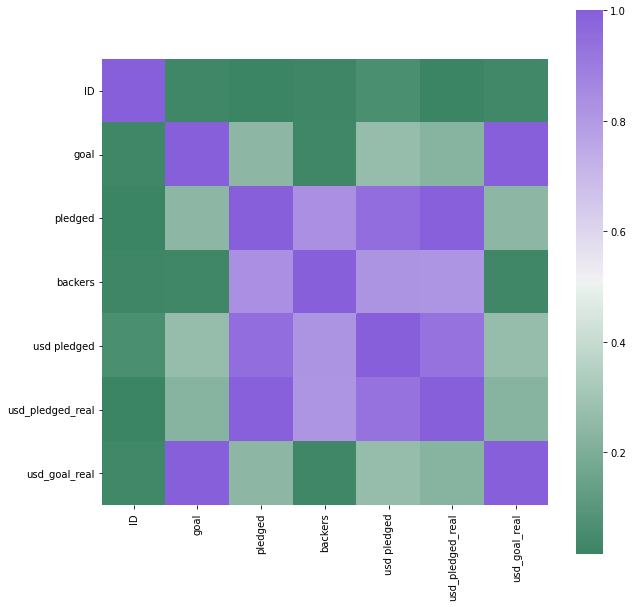

In [82]:
import seaborn as sns

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(150, 275, as_cmap = True), square = True, ax = ax)

In [83]:
dfTrain = kickstarter2[:1000]
dfTest = kickstarter2[1000:1300]
dfCheck = kickstarter2[1300:]

In [85]:
train_y = np.asarray(dfTrain['backers']) 
train_x = np.asarray(dfTrain.drop('backers',1)) 
test_y = np.asarray(dfTest['backers']) 
test_x = np.asarray(dfTest.drop('backers',1))
train_x 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


array([[1000002330, 'The Songs of Adelaide & Abullah', 'Poetry', ...,
        0.0, 0.0, 1533.95],
       [1000003930, 'Greeting From Earth: ZGAC Arts Capsule For ET',
        'Narrative Film', ..., 100.0, 2421.0, 30000.0],
       [1000004038, 'Where is Hank?', 'Narrative Film', ..., 220.0,
        220.0, 45000.0],
       ...,
       [1000598804, 'Gone In 61 Seconds', 'Tabletop Games', ..., 420.0,
        875.0, 1000.0],
       [1000600012, "YA science-fiction/comedy book series: Zeek Kim'lo",
        'Young Adult', ..., 1.44, 1.43, 14287.14],
       [1000600526, 'Rising Star - Unsigned Artist Compilation Album',
        'Hip-Hop', ..., 0.0, 0.0, 917.77]], dtype=object)